In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
# Load the datasets into pandas DataFrames
train = pd.read_csv('stressTrain.csv')
test = pd.read_csv('stressTest.csv')

In [ ]:
train.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,emotion_dict,emotion,emotion_score,depression_dict,depression,depression_score
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,0.86,1,3.253573,-0.002742,"{'sadness': 0.8615209460258484, 'joy': 0.01135...",sadness,0.861521,"{'not depression': 0.05522879213094711, 'moder...",severe,0.925075
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,0.65,2,8.828316,0.292857,"{'sadness': 0.0006045617046765983, 'joy': 0.99...",joy,0.995711,"{'not depression': 0.9972746968269348, 'modera...",not depression,0.997275
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,0.67,0,7.841667,0.011894,"{'sadness': 0.00900994148105383, 'joy': 0.0993...",surprise,0.553247,"{'not depression': 0.08891179412603378, 'moder...",moderate,0.908757
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,0.50,5,4.104027,0.141671,"{'sadness': 0.0018683557864278555, 'joy': 0.99...",joy,0.996496,"{'not depression': 0.28845489025115967, 'moder...",moderate,0.705378
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.00,1,7.910952,-0.204167,"{'sadness': 0.00044359886669553816, 'joy': 0.0...",anger,0.998097,"{'not depression': 0.03925717622041702, 'moder...",moderate,0.959911


In [ ]:
test.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,emotion_dict,emotion,emotion_score,depression_dict,depression,depression_score
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,0.63,62,-0.148707,0.000000,"{'sadness': 0.003137290943413973, 'joy': 0.988...",joy,0.988539,"{'not depression': 0.9726577401161194, 'modera...",not depression,0.972658
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.00,2,7.398222,-0.065909,"{'sadness': 0.008924799039959908, 'joy': 0.059...",anger,0.714295,"{'not depression': 0.9975798726081848, 'modera...",not depression,0.997580
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.00,8,3.149288,-0.036818,"{'sadness': 0.9414606094360352, 'joy': 0.01517...",sadness,0.941461,"{'not depression': 0.991377592086792, 'moderat...",not depression,0.991378
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.00,7,6.606000,-0.066667,"{'sadness': 0.9922717809677124, 'joy': 0.00179...",sadness,0.992272,"{'not depression': 0.698474109172821, 'moderat...",not depression,0.698474
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,0.84,70,4.801869,0.141667,"{'sadness': 0.0022474313154816628, 'joy': 0.04...",love,0.934402,"{'not depression': 0.9955556988716125, 'modera...",not depression,0.995556


In [ ]:
#categorical columns
train.select_dtypes(include=['object']).columns.tolist()

['subreddit',
 'post_id',
 'sentence_range',
 'text',
 'emotion_dict',
 'emotion',
 'depression_dict',
 'depression']

In [ ]:
train.subreddit.value_counts()

subreddit
ptsd                584
relationships       552
anxiety             503
domesticviolence    316
assistance          289
survivorsofabuse    245
homeless            168
almosthomeless       80
stress               64
food_pantry          37
Name: count, dtype: int64

In [ ]:
train = train.drop(['post_id', 'sentence_range', 'id'], axis = 1)
test = test.drop(['post_id', 'sentence_range', 'id'], axis = 1)

In [ ]:
df = pd.concat([train,test],axis=0,ignore_index=True)
df = df.sample(frac = 1).reset_index(drop = True)
df.head()

,subreddit,text,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,...,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,emotion_dict,emotion,emotion_score,depression_dict,depression,depression_score
0,assistance,It would be awesome to see how many people I c...,0,1.000000,1.493932e+09,8,4.022069,56,4.25,70.40,...,0.65,3,5.820207,0.759375,"{'sadness': 0.0002882234985008836, 'joy': 0.99...",joy,0.998747,"{'not depression': 0.9969846606254578, 'modera...",not depression,0.996985
1,assistance,I've been assured this last repair will fix ev...,0,0.600000,1.527270e+09,0,5.145730,84,54.14,14.19,...,0.20,1,7.129528,0.010795,"{'sadness': 0.01726646162569523, 'joy': 0.8704...",joy,0.870455,"{'not depression': 0.9710299372673035, 'modera...",not depression,0.971030
2,domesticviolence,He keeps going back to her. He even cleans up ...,1,0.571429,1.501783e+09,4,2.298312,76,6.15,99.00,...,1.00,4,3.105195,-0.208333,"{'sadness': 0.5916210412979126, 'joy': 0.22177...",sadness,0.591621,"{'not depression': 0.10727889090776443, 'moder...",moderate,0.890862
3,anxiety,"People say ""follow your gut"" but I don't even ...",1,0.800000,1.539570e+09,3,4.770392,84,4.65,50.00,...,1.00,2,6.038529,-0.023148,"{'sadness': 0.0010169424349442124, 'joy': 0.99...",joy,0.994677,"{'not depression': 0.7126984596252441, 'modera...",not depression,0.712698
4,ptsd,But it seems like I'm also dealing with abando...,1,0.600000,1.505886e+09,1,9.602976,105,9.27,12.66,...,0.67,9,9.495357,-0.028490,"{'sadness': 0.0010477842297405005, 'joy': 0.99...",joy,0.997489,"{'not depression': 0.8261376023292542, 'modera...",not depression,0.826138


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['subreddit'] = le.fit_transform(df['subreddit'])

In [ ]:
import tensorflow as tf
import transformers
import tqdm
from keras.preprocessing import sequence

#creating a function
def func_tokenizer(tokenizer_name, docs):
    features = []
    for doc in tqdm.tqdm(docs, desc = 'converting documents to features'):
        tokens = tokenizer_name.tokenize(doc)
        ids = tokenizer_name.convert_tokens_to_ids(tokens)
        features.append(ids)
    return features
print("The function is created successfully")

The function is created successfully


In [ ]:
#Initialize bert tokenizer
bert_tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased')

X,y = df[['text', 'lex_liwc_Tone', 'lex_liwc_negemo', 'lex_liwc_Clout','lex_liwc_i', 'sentiment' ]], df['label']
bert_features = func_tokenizer(bert_tokenizer, X['text'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

converting documents to features: 100%|██████████| 3553/3553 [00:07<00:00, 474.58it/s]


In [ ]:
bert_trg = sequence.pad_sequences(bert_features, maxlen = 500)

In [ ]:
X = pd.DataFrame(bert_trg)

X = X.assign(lex_liwc_negemo = df['lex_liwc_negemo'].values)
X = X.assign(lex_liwc_Tone= df['lex_liwc_Tone'].values)
X = X.assign(lex_liwc_Clout = df['lex_liwc_Clout'].values)
X = X.assign(lex_liwc_i = df['lex_liwc_i'].values)
X = X.assign(sentiment = df['sentiment'].values)
X = X.assign(lex_dal_min_pleasantness = df['lex_dal_min_pleasantness'].values)
X = X.assign(lex_liwc_posemo = df['lex_liwc_posemo'].values)
X = X.assign(lex_liwc_anx = df['lex_liwc_anx'].values)
X = X.assign(lex_liwc_Authentic = df['lex_liwc_Authentic'].values)
X = X.assign(lex_liwc_social = df['lex_liwc_social'].values)
X = X.assign(lex_liwc_Analytic = df['lex_liwc_Analytic'].values)
X = X.assign(lex_liwc_function = df['lex_liwc_function'].values)
X = X.assign(lex_liwc_Dic = df['lex_liwc_Dic'].values)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB()
}

In [ ]:
# Convert feature names to string type
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [ ]:
# Train and evaluate each classifier
results = {}
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    results[clf_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Confusion Matrix": confusion_mat
    }
    print(f"{clf_name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    print(f"Confusion Matrix:\n{confusion_mat}\n")

Logistic Regression:
Accuracy: 0.6554, Precision: 0.6484, Recall: 0.6936
Confusion Matrix:
[[217 135]
 [110 249]]

K-Nearest Neighbors:
Accuracy: 0.4979, Precision: 0.5035, Recall: 0.4011
Confusion Matrix:
[[210 142]
 [215 144]]

Support Vector Machine:
Accuracy: 0.5148, Precision: 0.5161, Recall: 0.6240
Confusion Matrix:
[[142 210]
 [135 224]]

Random Forest:
Accuracy: 0.7440, Precision: 0.7323, Recall: 0.7772
Confusion Matrix:
[[250 102]
 [ 80 279]]

Gradient Boosting:
Accuracy: 0.7398, Precision: 0.7289, Recall: 0.7716
Confusion Matrix:
[[249 103]
 [ 82 277]]

AdaBoost:
Accuracy: 0.7173, Precision: 0.7047, Recall: 0.7577
Confusion Matrix:
[[238 114]
 [ 87 272]]

XGBoost:
Accuracy: 0.7496, Precision: 0.7413, Recall: 0.7744
Confusion Matrix:
[[255  97]
 [ 81 278]]

Decision Tree:
Accuracy: 0.6118, Precision: 0.6089, Recall: 0.6462
Confusion Matrix:
[[203 149]
 [127 232]]

Gaussian Naive Bayes:
Accuracy: 0.5007, Precision: 0.6429, Recall: 0.0251
Confusion Matrix:
[[347   5]
 [350   9]]

<ipython-input-24-bc848f588590>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=models, palette='viridis')


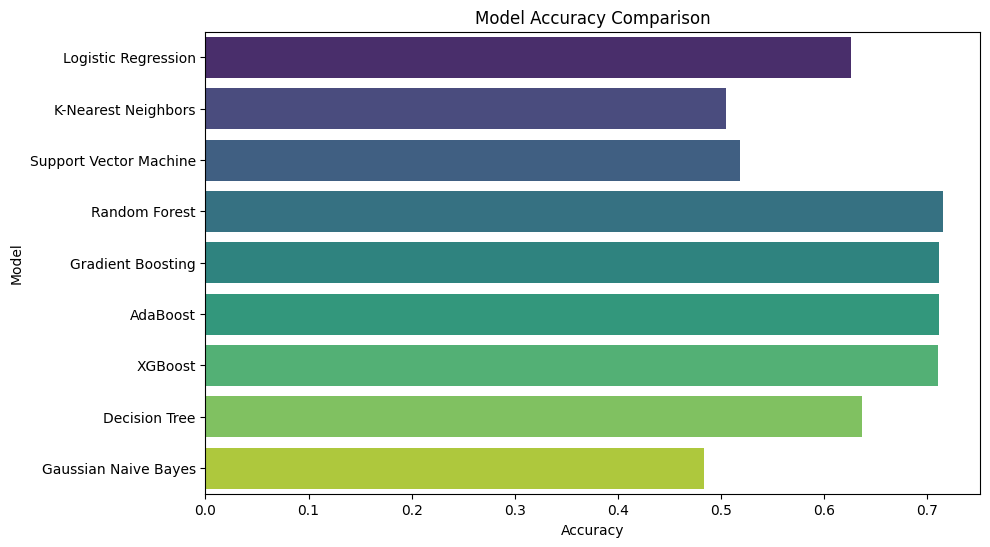

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data
models = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Support Vector Machine",
    "Random Forest",
    "Gradient Boosting",
    "AdaBoost",
    "XGBoost",
    "Decision Tree",
    "Gaussian Naive Bayes"
]
accuracies = [
    0.6259,  # Logistic Regression
    0.5049,  # K-Nearest Neighbors
    0.5190,  # Support Vector Machine
    0.7159,  # Random Forest
    0.7117,  # Gradient Boosting
    0.7117,  # AdaBoost
    0.7103,  # XGBoost
    0.6371,  # Decision Tree
    0.4838   # Gaussian Naive Bayes
]

# Create bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=models, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.show()


Random forest shows better accuracy

In [ ]:
# Load the datasets into pandas DataFrames
train_df_SED_text = pd.read_csv('stressTrain.csv')
test_df_SED_text = pd.read_csv('stressTest.csv')

# Concatenate the training and test DataFrames
df = pd.concat([train_df_SED_text, test_df_SED_text], ignore_index=True)

# Assuming 'text' column contains the input text and 'label' column contains the target label
X = df['text'].values.astype(str)  # Convert to string format
y = df['label'].values

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
# Vectorize the text data using TF-IDF Vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Define Random Forest Classifier
random_forest_model = RandomForestClassifier()

# Train the Random Forest model
random_forest_model.fit(X_train_tfidf, y_train)

# Predict using the trained Random Forest model
y_pred = random_forest_model.predict(X_test_tfidf)

In [ ]:
# Sample testing based on user input
user_input = input("Enter your text: ")
input_tfidf = tfidf_vectorizer.transform([user_input])
predicted_label = random_forest_model.predict(input_tfidf)[0]

# Display the prediction
if predicted_label == 1:
    print("The text indicates stress.")
else:
    print("The text does not indicate stress.")

Enter your text: i am scared
The text indicates stress.
